#### Notebook config

In [1]:
# %load ../../software/fullwavepy/fullwavepy/config/jupyter.py 
from arrau import *
from fullwavepy import * # Load modules imported in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook
# -----------------------------------------------------------------------------
# Set matplotlib backend
# -----------------------------------------------------------------------------
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# interactive plots displayed in a notebook cell
# %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# Set matplotlib style
# ----------------------------------------------------------------------------
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot', 'kmc_test'])
# print(plt.style.available) 
# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers and load the log_lvl function
from fullwavepy.config.logging import *
# -----------------------------------------------------------------------------
# Set level of log-messages
log_lvl(INFO) 
# Other options in order of increasing importance and 
# decreasing verbosity:
# TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50, respectively
# -----------------------------------------------------------------------------
# Autocompleting
# -----------------------------------------------------------------------------
#  Not sure if it works
%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 2

Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


Suppress printing logs except warnings and errors:

In [3]:
lll(40)

Set the path for projects accessible by the computational cluster:

In [4]:
path_eph = '/home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch08_Kolumbo_volcano'

Load the experiment's metadata:

In [5]:
xp = PROTEUS()
xp.read_all()

##### Test the `fullwavepy.seismic.data` package

In [12]:
!python3 -m unittest fullwavepy.seismic.test.test_data  -v

test_data_muter_susgy (fullwavepy.seismic.test.test_data.TestDataMuter) ... ok
test_extract (fullwavepy.seismic.test.test_data.TestDataSet) ... ok
test_get_files (fullwavepy.seismic.test.test_data.TestDataSet) ... ok
test_get_files_within_extent (fullwavepy.seismic.test.test_data.TestDataSet) ... ok
test_get_stations_within_extent (fullwavepy.seismic.test.test_data.TestDataSet) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.039s

OK


# Define a box

#### Tab.
`b01` - a box of the study area from the thesis.

In [6]:
# all in metres 
x1 = +8.0e3
x2 = +2.5e4   
y1 = -3.0e3   
y2 = +1.5e4    
z1 = 0
z2 = +4.0e3
b01 = Box3d(x1, x2, y1, y2, z1, z2)

# Extract data

#### Alg.
First, initialise the entire PROTEUS **hydrophone** dataset:

In [7]:
path = '/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS/segy_local_coords/'
ds_full = DataSet(path, # hy for hydrophone 
                  io='proteus_hy', # this defines how metadata are scraped from file names
                 ) 
ds_full.names[:2]

['MGL1521_S101_4.sgy', 'MGL1521_S102_4.sgy']

#### Alg.
Extract a subset of data contained in the box.

In [8]:
%%time 
ds = ds_full.extract(b01.xy, path='./data/', name='dataset_obs_hy_box01')

 mkdir: cannot create directory ‘./data//dataset_obs_hy_box01’: File exists

CPU times: user 40 ms, sys: 52 ms, total: 92 ms
Wall time: 2min 14s


#### Alg.
Fast-init of the extracted subset of data contained in the box.

In [ ]:
ds = DataSet(path='./data/dataset_obs_hy_box01/', regex='*00.sgy', io='proteus_hy')

More verbose:

In [8]:
ds = DataSet(path='./data/dataset_obs_hy_box01/',
             regex='*00.sgy', # this should ensure no extra files are parsed
             io='proteus_hy'  # this determines how metadata are scraped from file names
)

All receiver-gather files are stored in a dictionary with receiver IDs as keys:

In [10]:
ds.id

{104: <fullwavepy.seismic.data.DataFileSgy at 0x7ff74d3ab4e0>,
 105: <fullwavepy.seismic.data.DataFileSgy at 0x7ff74d3ab160>,
 109: <fullwavepy.seismic.data.DataFileSgy at 0x7ff74d3ab518>,
 110: <fullwavepy.seismic.data.DataFileSgy at 0x7ff74d3abe10>,
 112: <fullwavepy.seismic.data.DataFileSgy at 0x7ff74d3ab7f0>,
 123: <fullwavepy.seismic.data.DataFileSgy at 0x7ff74d3ab320>,
 124: <fullwavepy.seismic.data.DataFileSgy at 0x7ff74d3ab3c8>,
 125: <fullwavepy.seismic.data.DataFileSgy at 0x7ff74d3ab1d0>,
 137: <fullwavepy.seismic.data.DataFileSgy at 0x7ff74d3ab438>,
 138: <fullwavepy.seismic.data.DataFileSgy at 0x7ff74d3ab358>,
 139: <fullwavepy.seismic.data.DataFileSgy at 0x7ff74d3ab390>,
 157: <fullwavepy.seismic.data.DataFileSgy at 0x7ff74d3ab240>,
 158: <fullwavepy.seismic.data.DataFileSgy at 0x7ff74d3ab2b0>,
 176: <fullwavepy.seismic.data.DataFileSgy at 0x7ff74d3abdd8>,
 177: <fullwavepy.seismic.data.DataFileSgy at 0x7ff74d3ab2e8>,
 178: <fullwavepy.seismic.data.DataFileSgy at 0x7ff74d3

# Plot extracted

#### Fig.
Example of a raw receiver gather.

In [19]:
import matplotlib
font = {'family' : 'sans-serif', # serif
        'weight' : 'normal', # bold
        'size'   : 20}
matplotlib.rc('font', **font)

In [27]:
ds.id

{104: <fullwavepy.seismic.data.DataFileSgy at 0x7f0a1f608dd8>,
 105: <fullwavepy.seismic.data.DataFileSgy at 0x7f0a1fc169b0>,
 109: <fullwavepy.seismic.data.DataFileSgy at 0x7f0a1ff35208>,
 110: <fullwavepy.seismic.data.DataFileSgy at 0x7f0a1fc16668>,
 112: <fullwavepy.seismic.data.DataFileSgy at 0x7f0a1ff351d0>,
 123: <fullwavepy.seismic.data.DataFileSgy at 0x7f0a1fc16dd8>,
 124: <fullwavepy.seismic.data.DataFileSgy at 0x7f0a1ff35198>,
 125: <fullwavepy.seismic.data.DataFileSgy at 0x7f0a1ff35160>,
 137: <fullwavepy.seismic.data.DataFileSgy at 0x7f0a1fc16550>,
 138: <fullwavepy.seismic.data.DataFileSgy at 0x7f0a1fc16080>,
 139: <fullwavepy.seismic.data.DataFileSgy at 0x7f0a1fc16710>,
 157: <fullwavepy.seismic.data.DataFileSgy at 0x7f0a1fc16f98>,
 158: <fullwavepy.seismic.data.DataFileSgy at 0x7f0a1fc16d68>,
 176: <fullwavepy.seismic.data.DataFileSgy at 0x7f0a1fc16278>,
 177: <fullwavepy.seismic.data.DataFileSgy at 0x7f0a1fc16240>,
 178: <fullwavepy.seismic.data.DataFileSgy at 0x7f0a1fc

In [21]:
from fullwavepy.seismic.data import Dat
ds = DataSet(path='./data/dataset_obs_hy_box01/',regex='*00.sgy',io='proteus_hy')
sid = 104
d = Dat(ds.id[sid], dt=0.005)

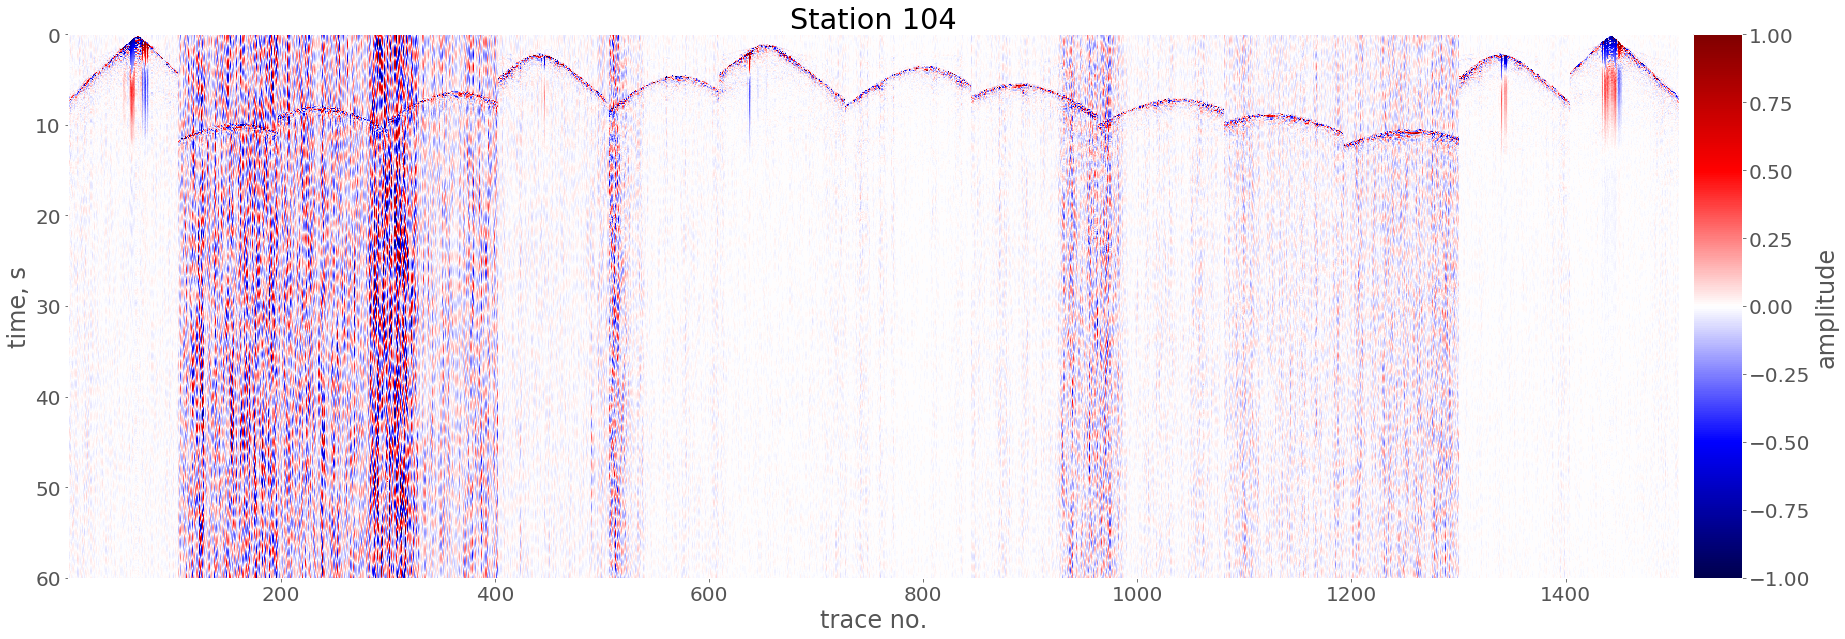

In [22]:
figure(30,10)
d.plot(title='Station %s' % sid)

#### Fig.
All shot lines of the above gather.

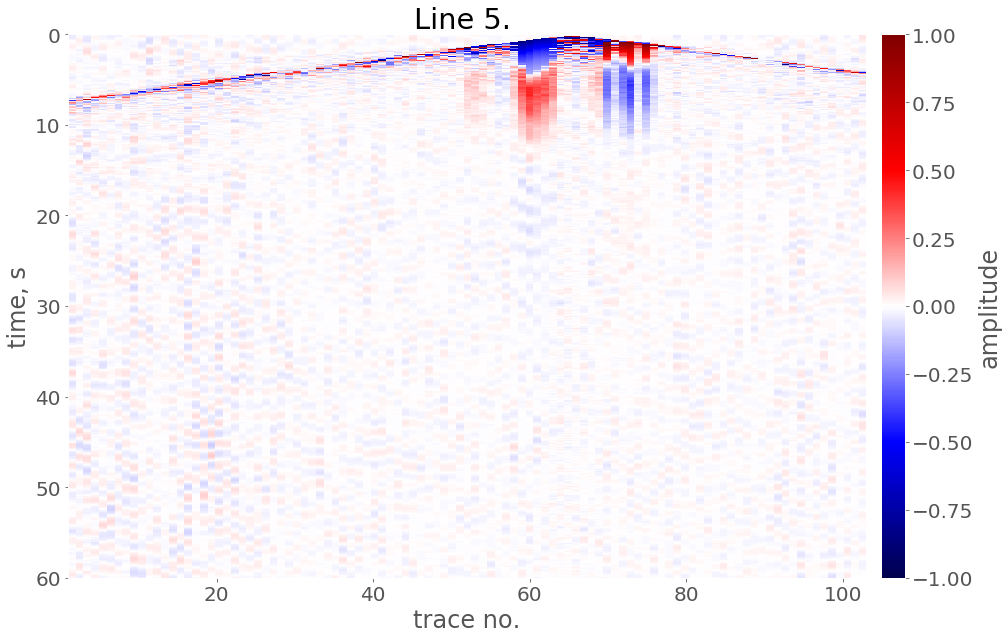

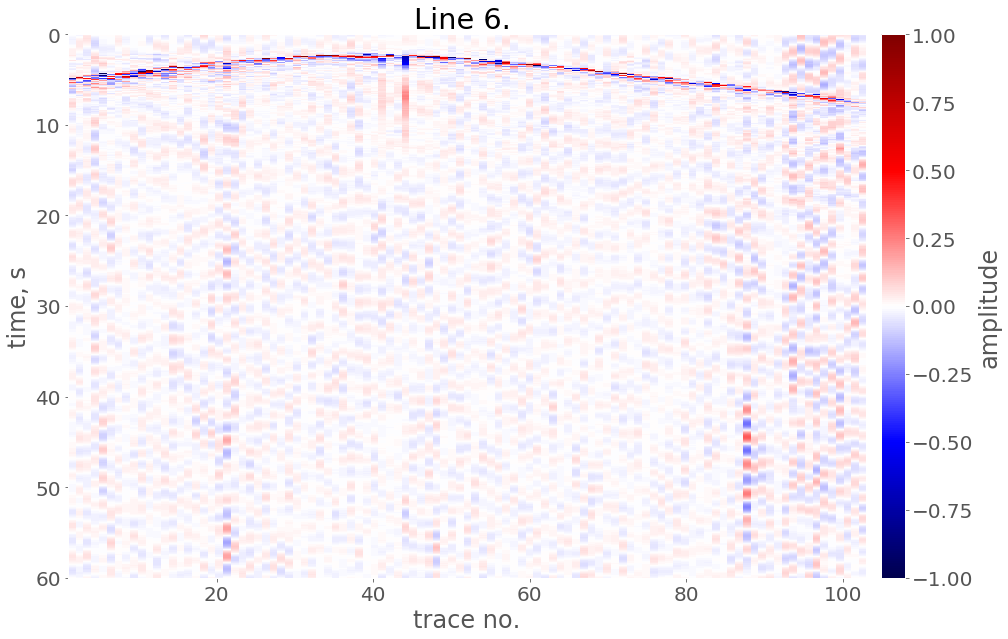

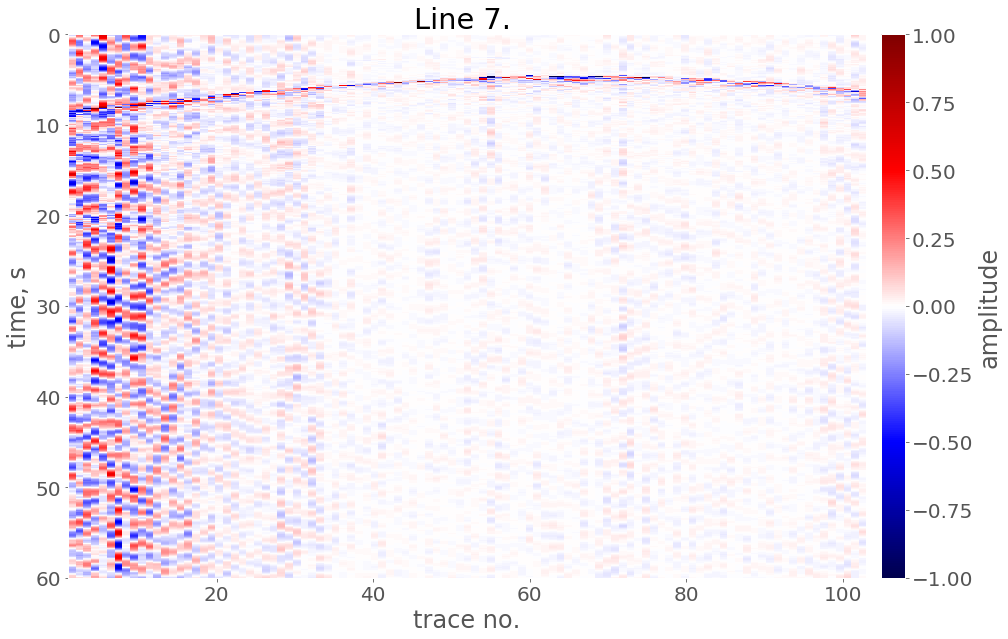

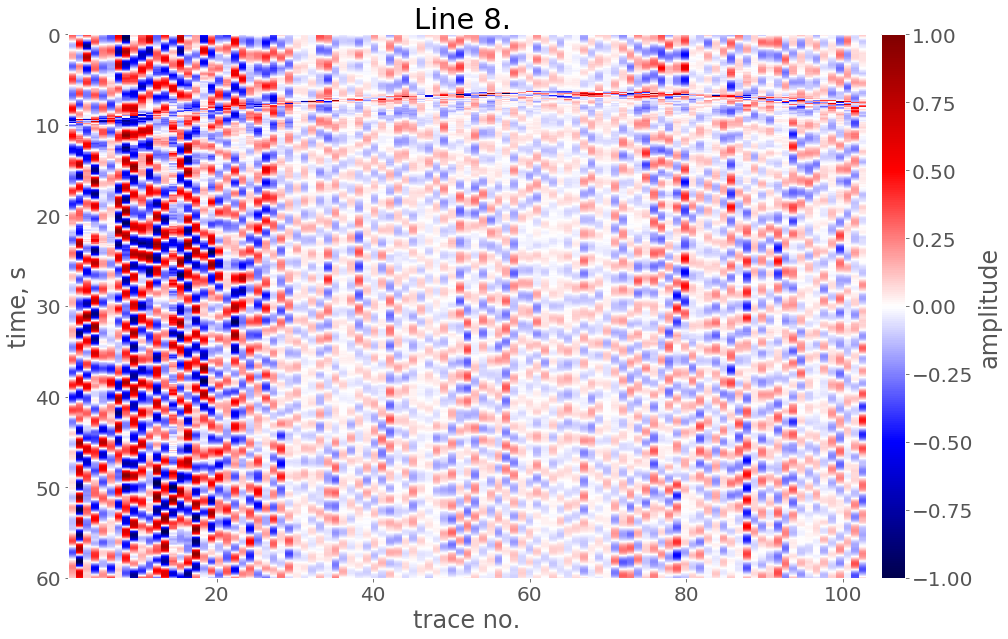

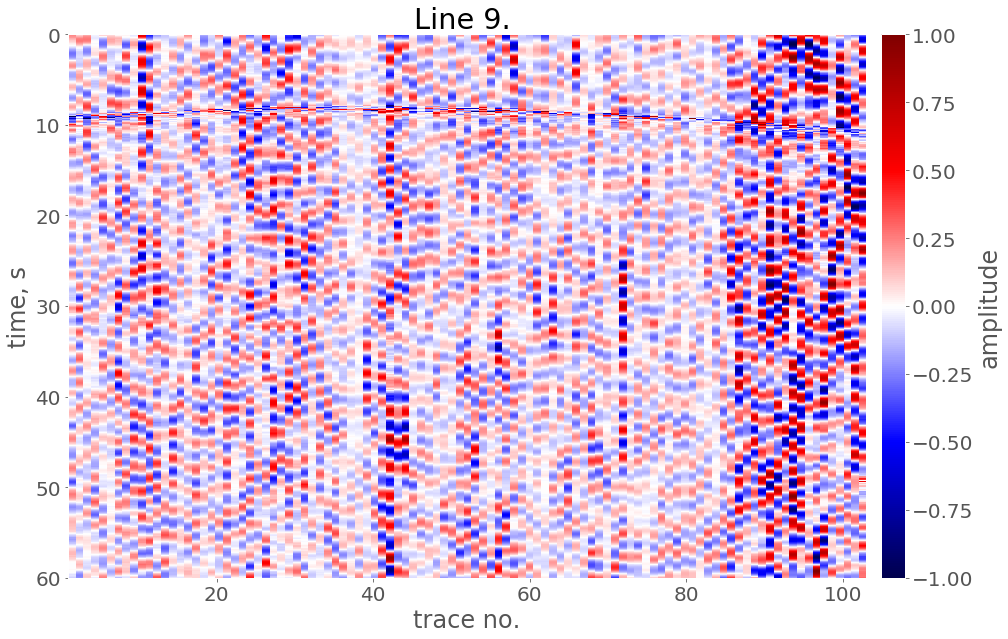

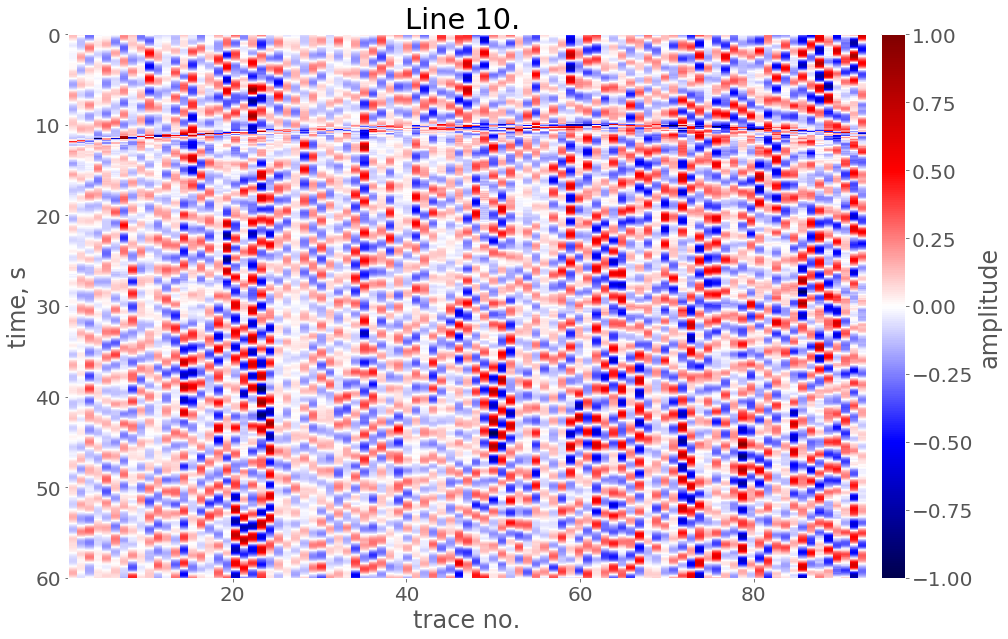

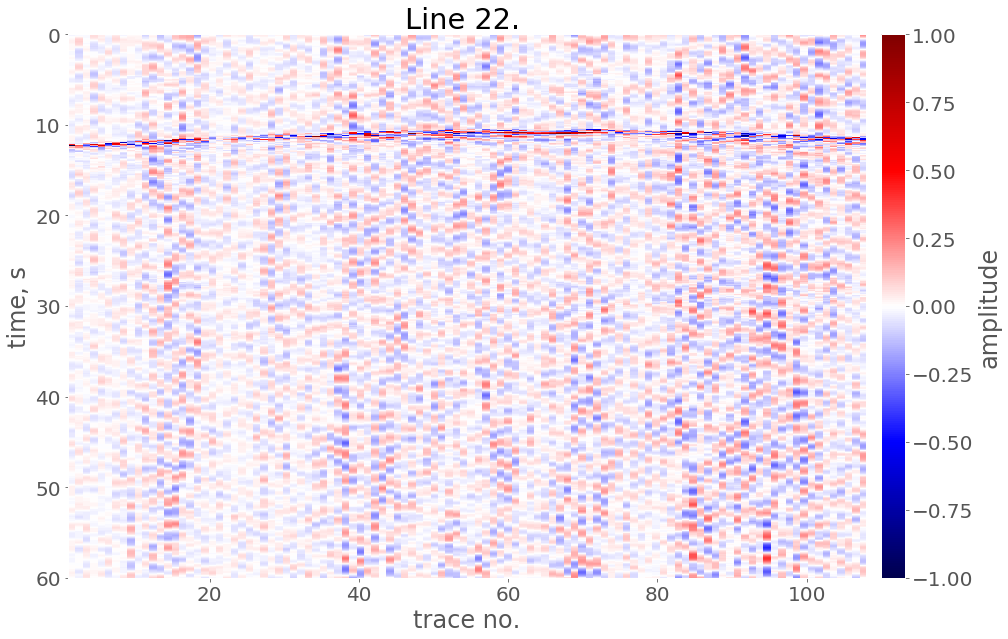

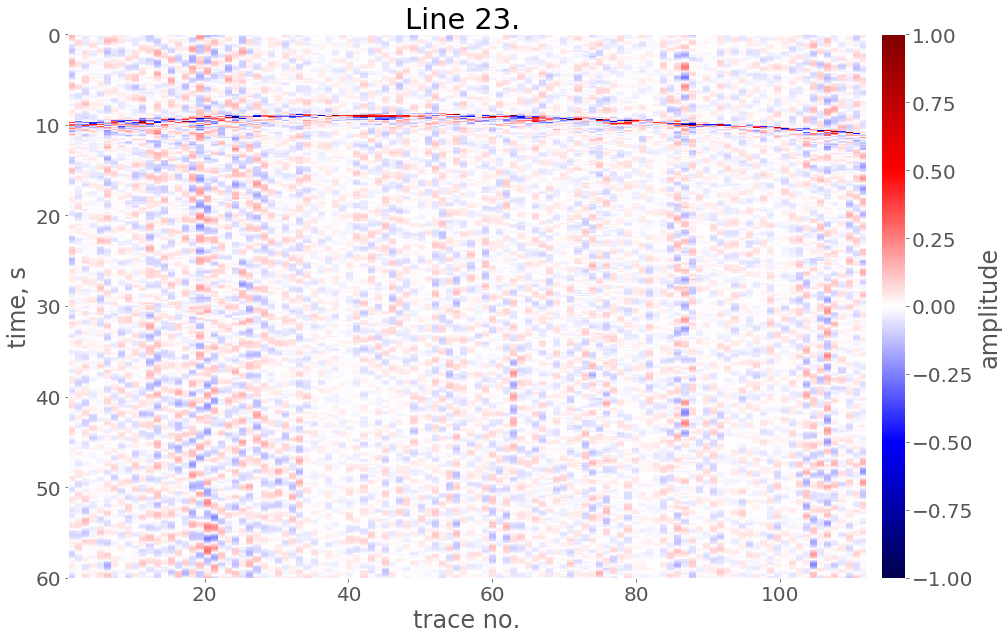

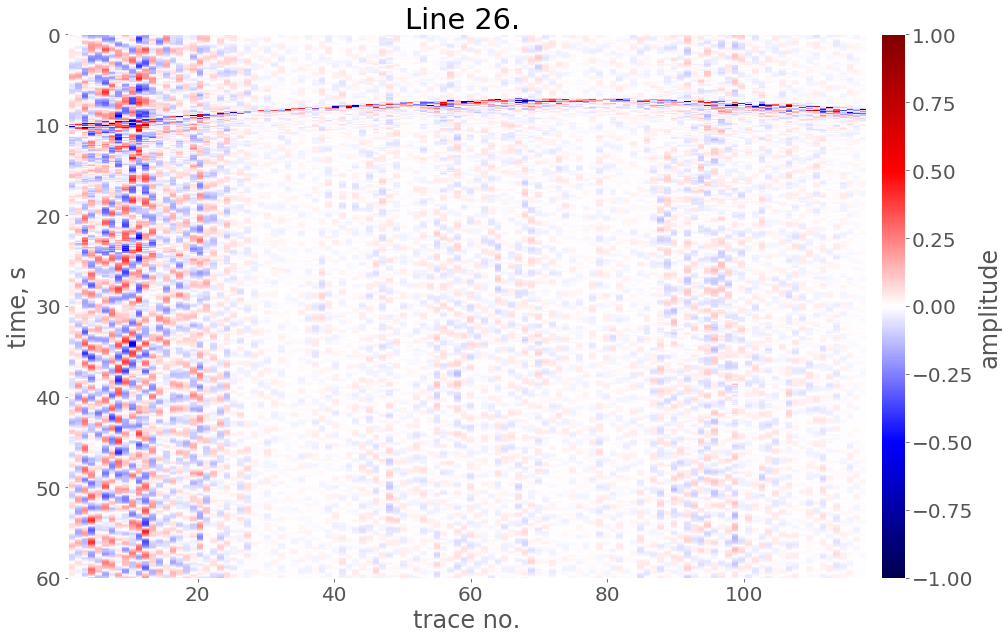

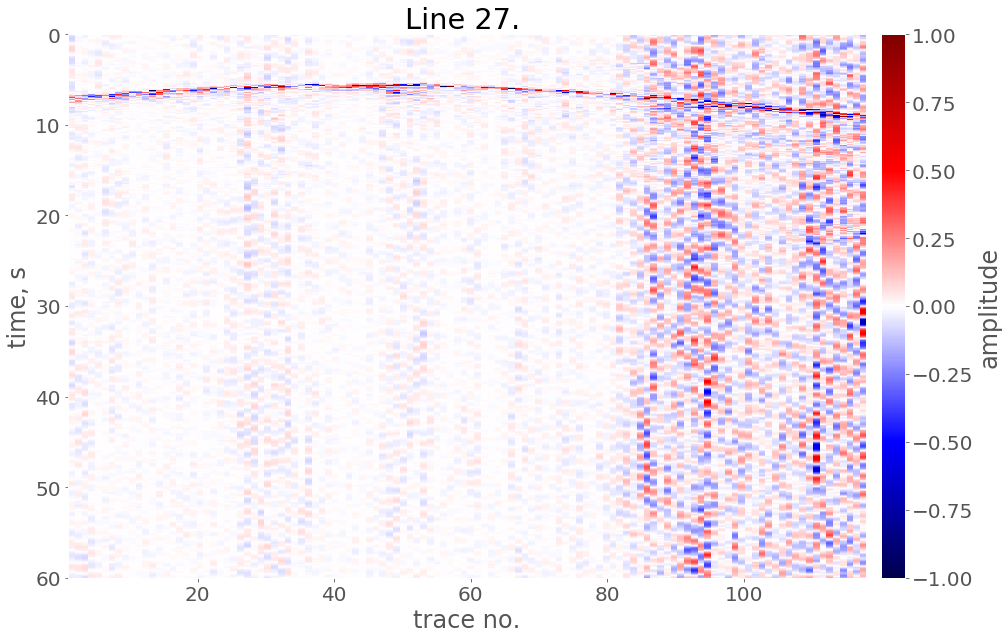

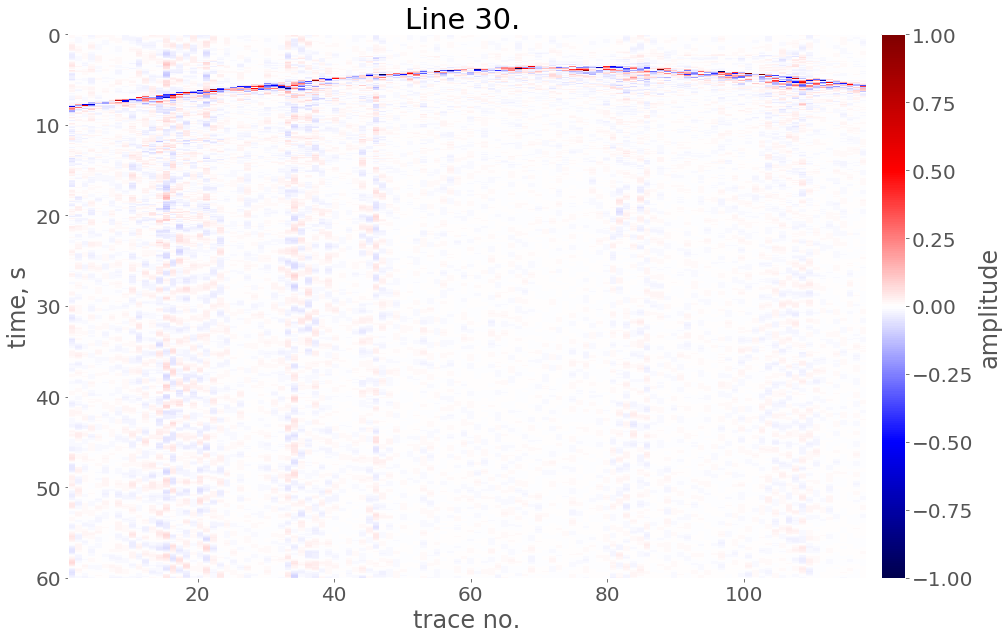

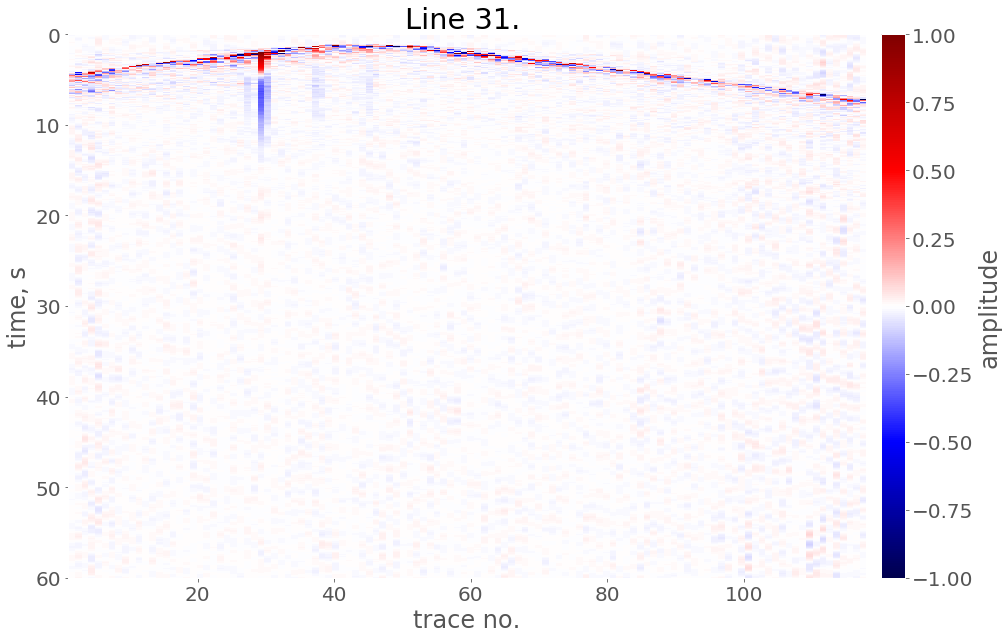

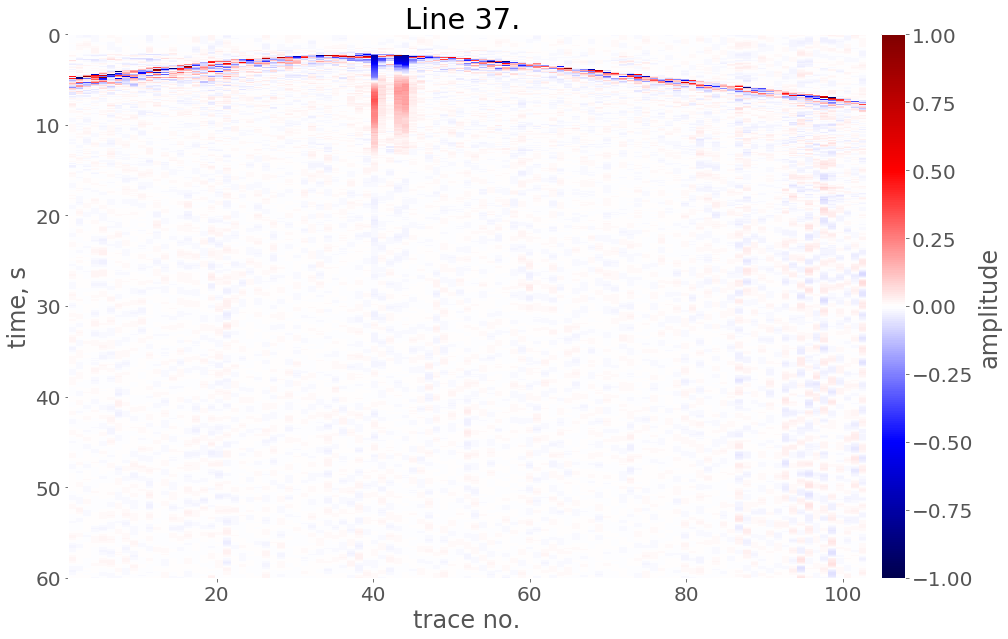

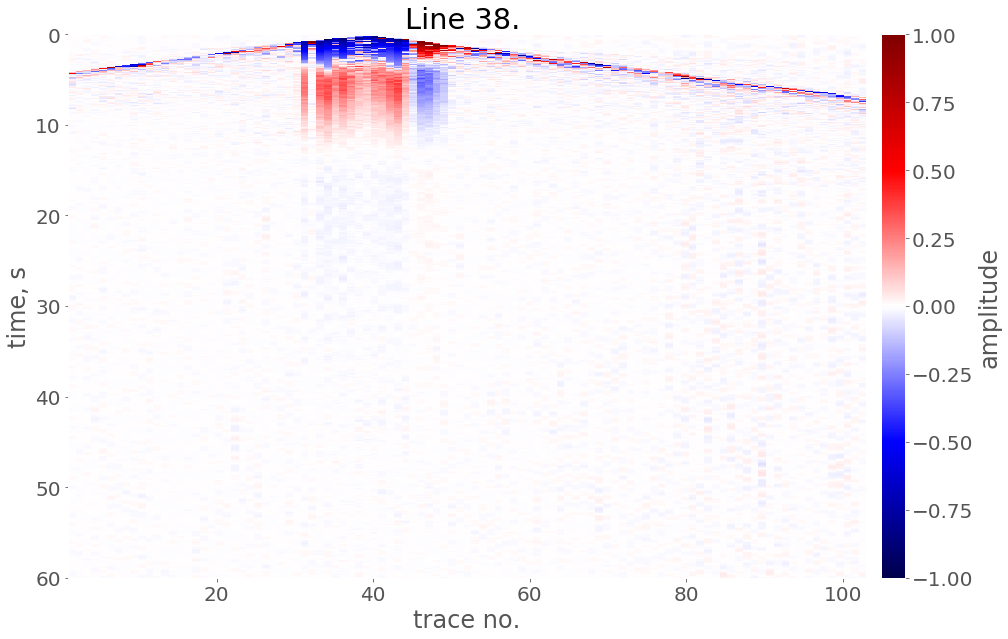

In [24]:
hd = d.file.read_header()
lines = sorted(hd.ep.unique())
for line in lines:
    figure(15,10)
    d.plot(line=line)

#### Fig.
Raw receiver gathers for all stations constrained by the `b01` box.

CPU times: user 3.61 s, sys: 8.25 s, total: 11.9 s
Wall time: 57.1 s


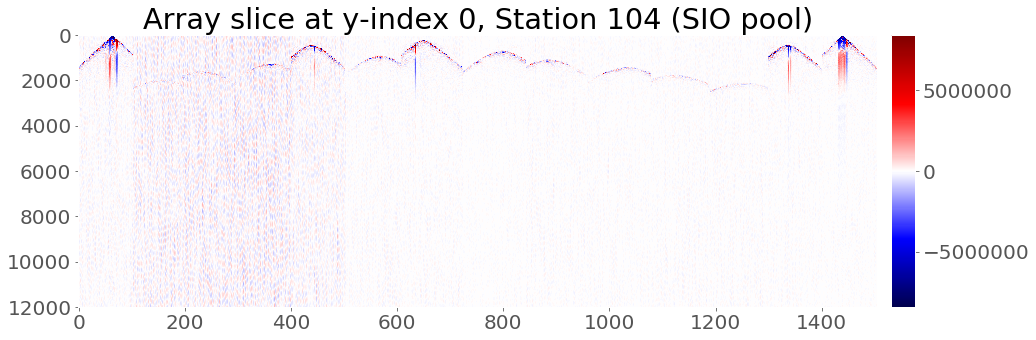

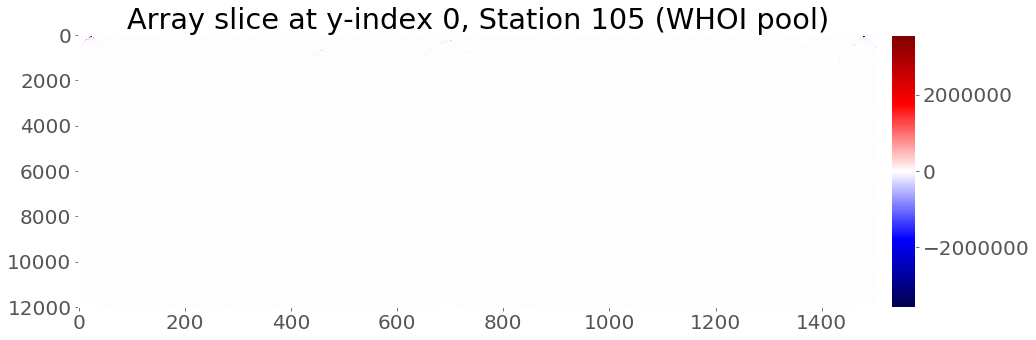

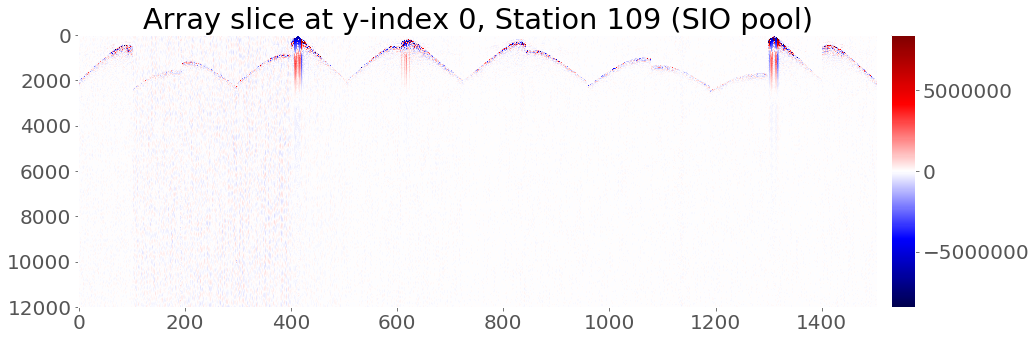

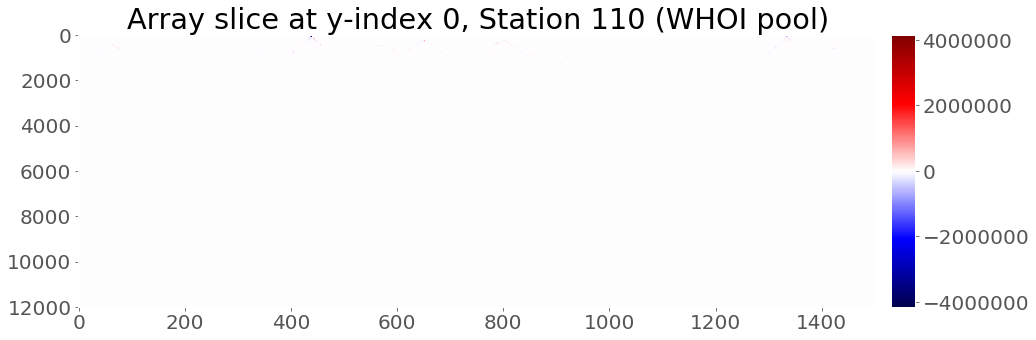

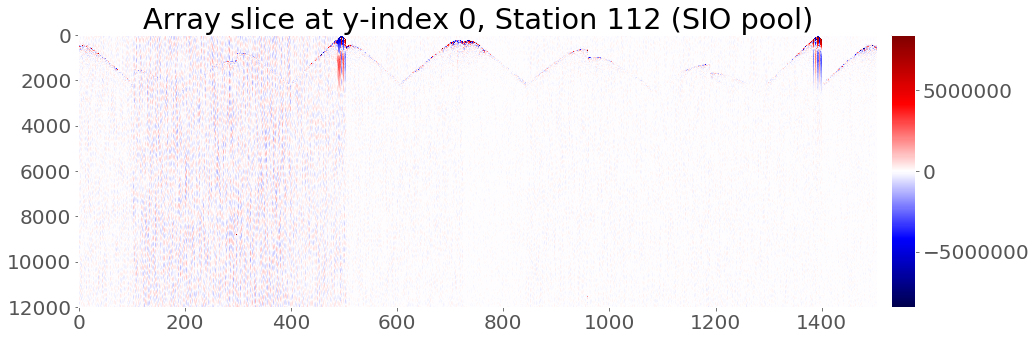

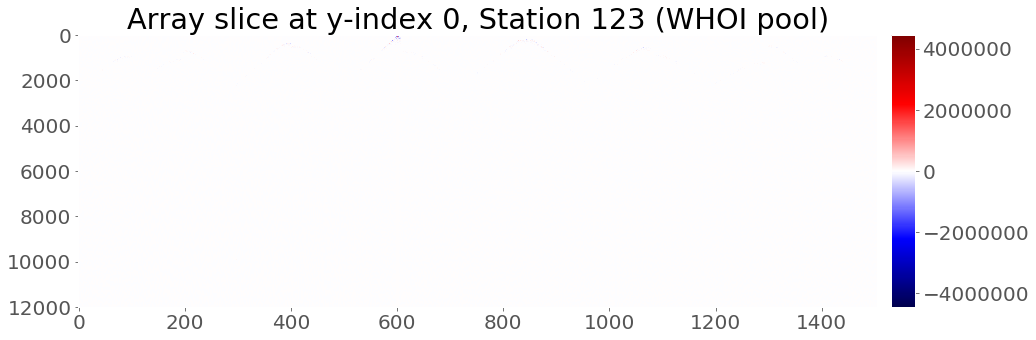

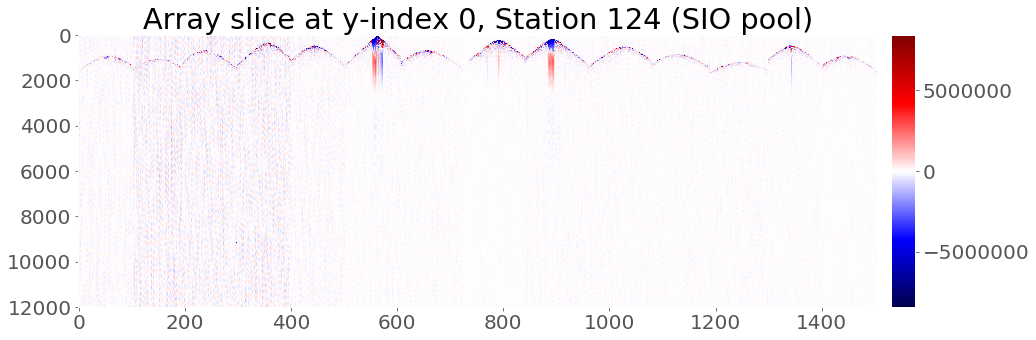

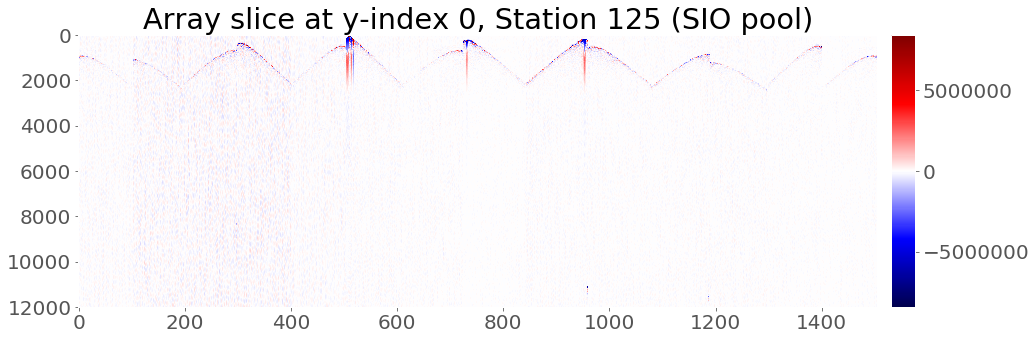

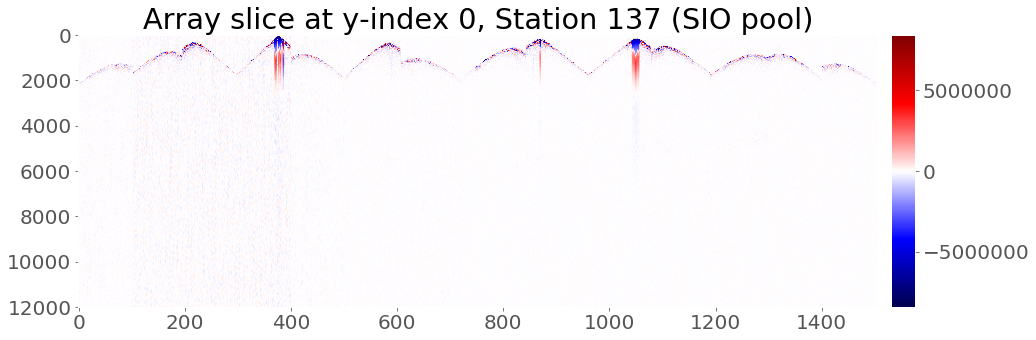

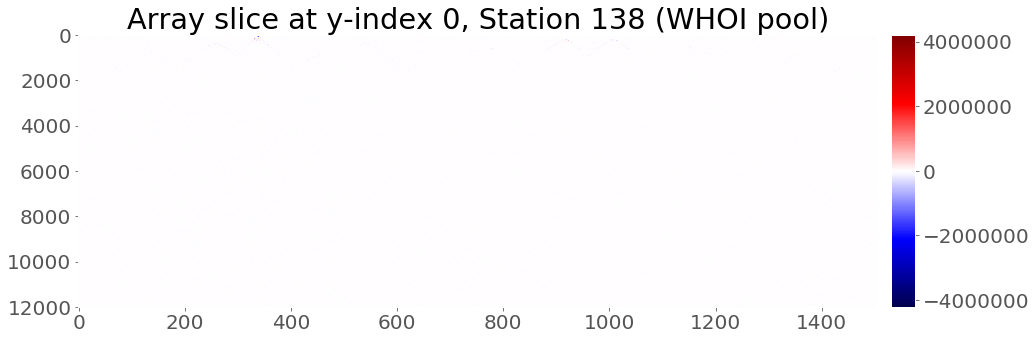

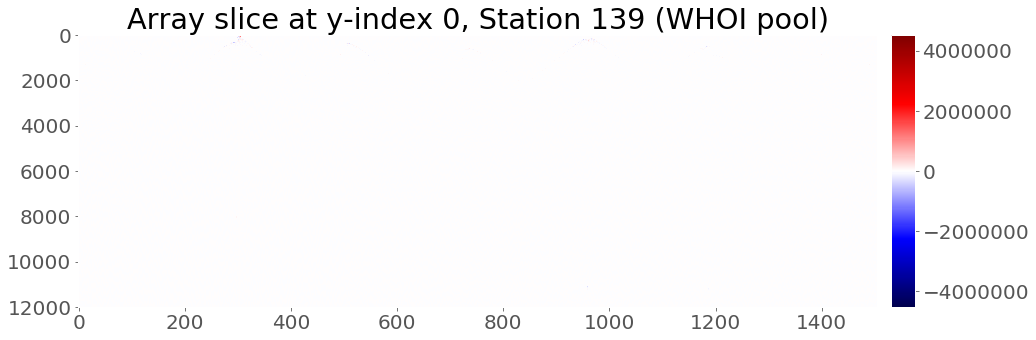

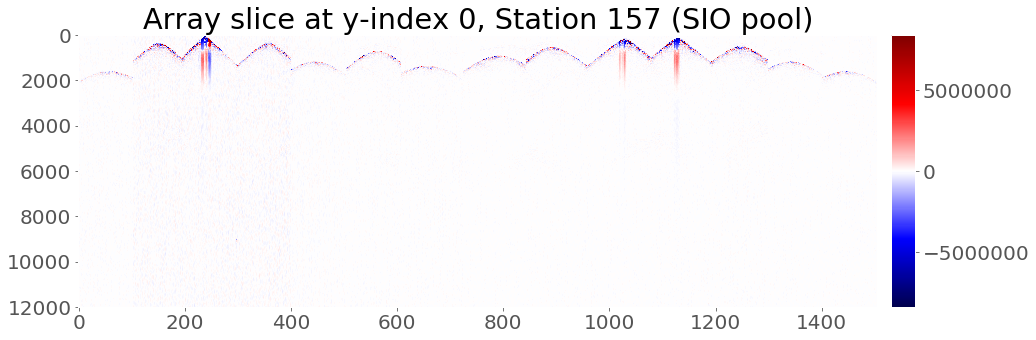

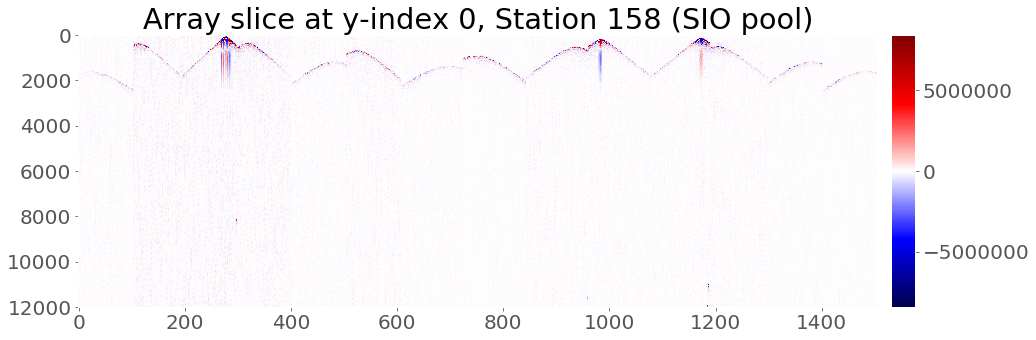

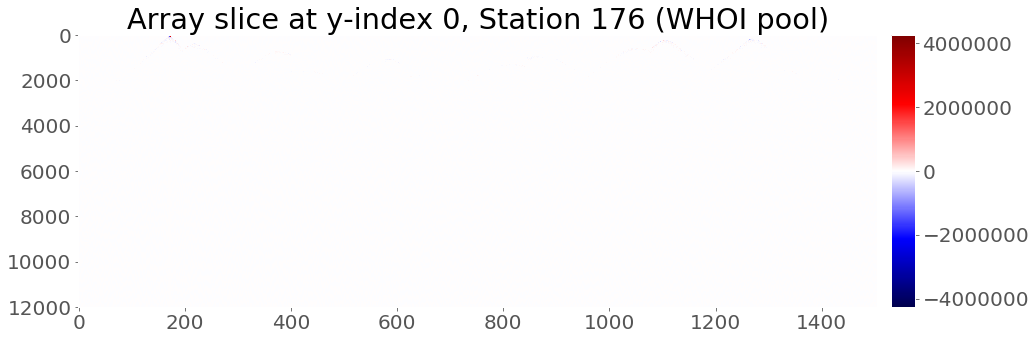

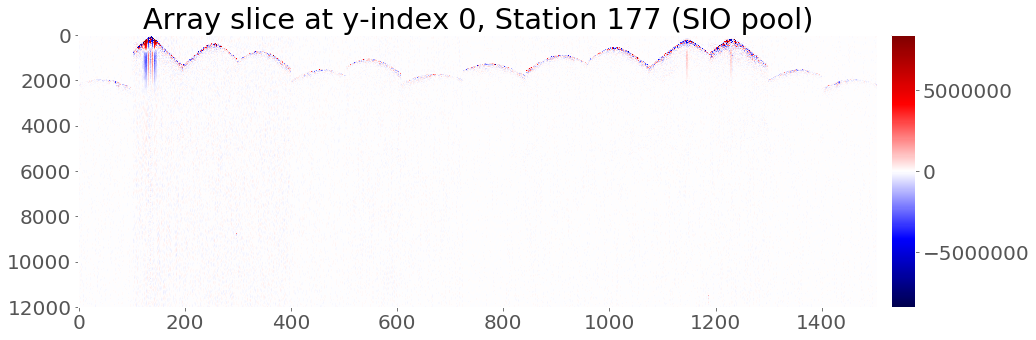

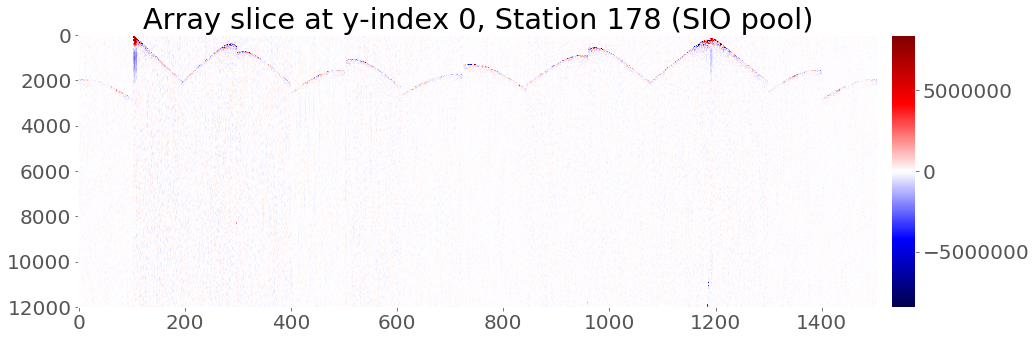

In [29]:
%%time 
df = xp.recs
for sid, f in sorted(ds._get_files().items()):
    pool = df.loc[df.id == sid].pool.values[0] # NOTE 
    figure(15,5) # fixme: make it point to Dat objects
    ds.id[sid].plot(title='Station %s (%s pool)' % (sid, pool))

# ...